In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from pathlib import Path
import sys

# Add src to path
sys.path.append('../src')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


✅ Data loaded: 768 rows, 9 columns
📋 Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
📊 DATASET BASIC INFORMATION
Dataset shape: (768, 9)
Memory usage: 0.05 MB

📋 DATA TYPES AND MISSING VALUES:
                            dtype  non_null_count  null_count  null_percentage
Pregnancies                 int64             768           0              0.0
Glucose                     int64             768           0              0.0
BloodPressure               int64             768           0              0.0
SkinThickness               int64             768           0              0.0
Insulin                     int64             768           0              0.0
BMI                       float64             768           0              0.0
DiabetesPedigreeFunction  float64             768           0              0.0
Age                         int64             768           0              0.0
Outcome   

c:\Users\hp\Desktop\diabetes-data-preparation\src\data_understanding.py:219: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Non-Diabetic', 'Diabetic'])


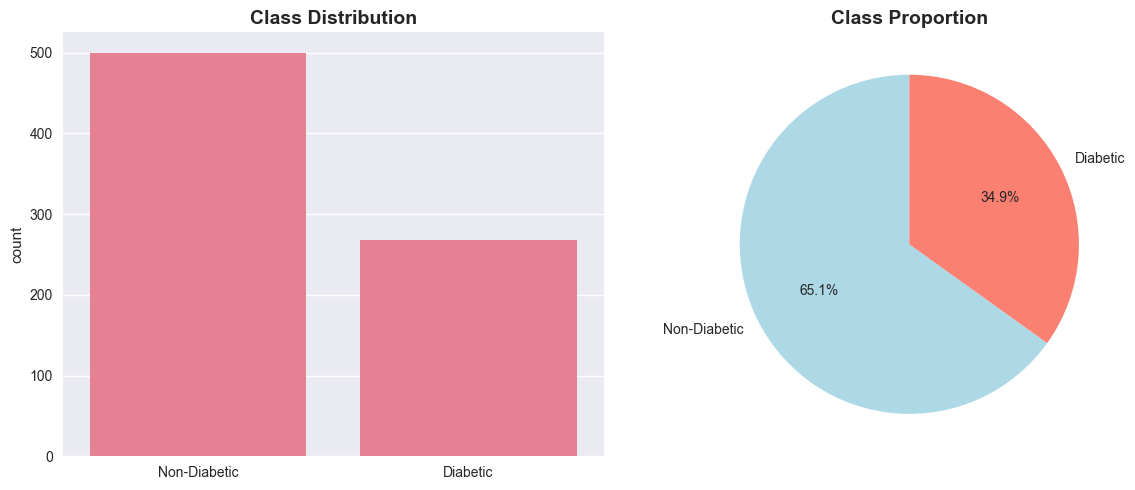

📋 INITIAL DATA ASSESSMENT REPORT

🚀 EXECUTIVE SUMMARY
• Dataset: 768 observations, 9 features
• Memory Usage: 0.05 MB
• Class Distribution: 0.536 imbalance ratio

⚠️ CRITICAL DATA QUALITY ISSUES
• Biological Impossibilities Found:
  - Glucose: 5 zeros (0.7%)
  - BloodPressure: 35 zeros (4.6%)
  - SkinThickness: 227 zeros (29.6%)
  - Insulin: 374 zeros (48.7%)
  - BMI: 11 zeros (1.4%)

• Missing Values: No true NaN values detected
• Note: Zeros are used as placeholders for missing values in biological features

💡 RECOMMENDATIONS FOR PHASE 2: DATA CLEANING
• Replace impossible zeros with NaN for proper imputation
• Use median imputation for biological features (robust to outliers)
• Consider domain knowledge for reasonable value ranges
• Handle class imbalance in Phase 5
• Proceed to outlier detection and treatment
🔗 FEATURE CORRELATIONS


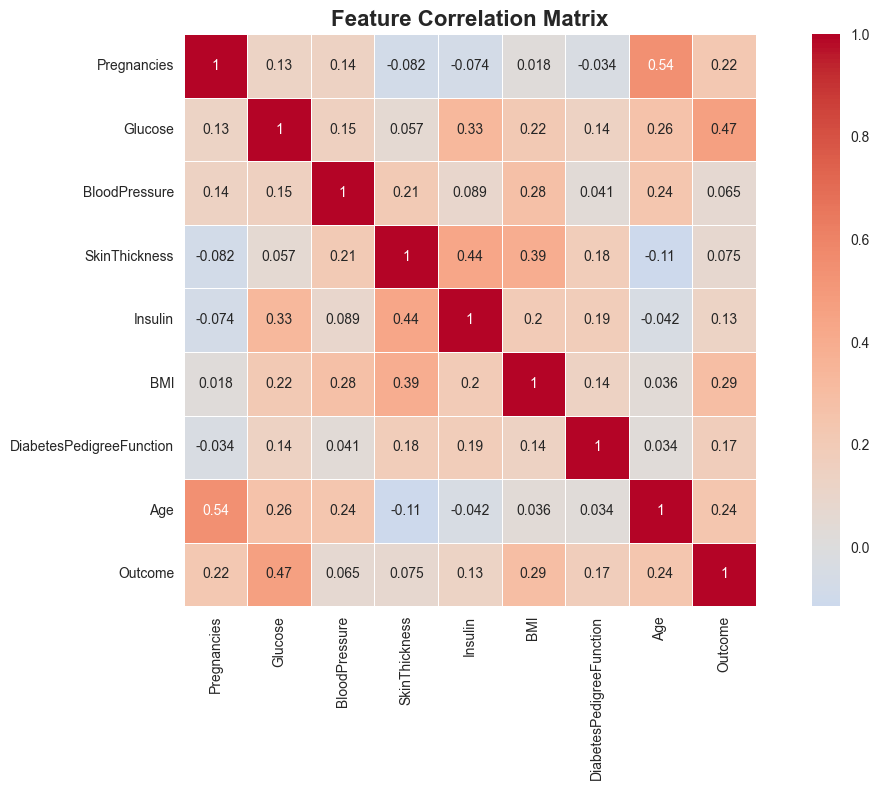


Top correlations with Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [2]:
# Use the corrected analyzer
import sys
import os
sys.path.append(os.path.abspath(".."))
from src.data_understanding import DiabetesDataAnalyzer

# Initialize analyzer
analyzer = DiabetesDataAnalyzer('../data/raw/Diabetes Missing Data.csv')

# Load and analyze data
df = analyzer.load_data()
info_df = analyzer.basic_assessment()
stats_df = analyzer.statistical_summary()
zero_analysis = analyzer.identify_biological_impossibilities()
target_analysis = analyzer.analyze_target_variable('Outcome')
analyzer.generate_assessment_report(zero_analysis, target_analysis)
print("🔗 FEATURE CORRELATIONS")
print("=" * 40)

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with target
print("\nTop correlations with Outcome:")
target_correlations = correlation_matrix['Outcome'].sort_values(ascending=False)
print(target_correlations)